# TD 3 - Mise en pratique des séances 1 et 2 - Utilisation de pandas et visualisation

## Exercice 2


Durée : 40 minutes

1) Importer la base des villes villes.xls

2) Les noms de variables et les observations contiennent des espaces inutiles (exemple : 'MAJ   ') : commnecer par nettoyer l'ensemble des chaines de caractères (à la fois dans les noms de colonnes et dans les observations)

3) Trouver le nombre de codes INSEE différents (attention aux doublons)

4) Comment calculer rapidement la moyenne, le nombre et le maximum pour chaque variable numérique ? (une ligne de code)

5) Compter le nombre de villes dans chaque Region et en faire un dictionnaire où la clé est la région et la valeur le nombre de villes

6) Représenter les communes en utilisant  

    a) matplotlib   
    
    b) une librairie de cartographie (ex : folium) 

In [2]:
import pandas
df_villes = pandas.read_excel("./villes.xls")
print(df_villes.columns)

Index([' Nom Ville ', 'MAJ   ', ' Code Postal ', ' Code INSEE ', 'Code Région',
       ' Latitude ', ' Longitude ', ' Eloignement '],
      dtype='object')


In [3]:
df_villes.head()

,Nom Ville,MAJ,Code Postal,Code INSEE,Code Région,Latitude,Longitude,Eloignement
0,L'Abergement-Clémenciat,L ABERGEMENT CLEMENCIAT,1400,1001,82,46.150000,4.916667,1.46
1,L'Abergement-de-Varey,L ABERGEMENT DE VAREY,1640,1002,82,46.000000,5.416667,1
2,Amareins,AMAREINS,1090,1003,82,46.083333,4.8,1.85
3,Ambérieu-en-Bugey,AMBERIEU EN BUGEY,1500,1004,82,45.950000,5.35,0.8
4,Ambérieux-en-Dombes,AMBERIEUX EN DOMBES,1330,1005,82,46.000000,4.9,1.72


## Nettoyage des noms

In [4]:
# Corriger les espaces en trop
# solution pour les espaces
# les colonnes
df_villes.rename(columns=lambda x: x.strip(),inplace = True)
# les observations
df_villes['Nom Ville'] = df_villes[['Nom Ville']].applymap(lambda x: x.strip())
df_villes['MAJ'] = df_villes[['MAJ']].applymap(lambda x: x.strip())

In [33]:
df_villes.columns

Index(['Nom Ville', 'MAJ', 'Code Postal', 'Code INSEE', 'Code Région',
       'Latitude', 'Longitude', 'Eloignement'],
      dtype='object')

## Nombre de codes commune

In [9]:
len(df_villes['Code INSEE'].unique())

35248

## Stats desc

In [12]:
df_villes.describe()

,Code Postal,Code INSEE,Code Région,Latitude
count,35249.000000,35249.000000,35249.000000,35249.000000
mean,46291.014554,46186.992822,48.532497,46.998450
std,25418.598824,25411.240496,27.264257,2.206877
min,1000.000000,1001.000000,0.000000,41.391667
25%,24640.000000,24550.000000,24.000000,45.216667
50%,49150.000000,49074.000000,43.000000,47.450000
75%,66720.000000,66203.000000,72.000000,48.850000
max,95880.000000,95690.000000,94.000000,51.083333


## Régions et nombre de communes

In [15]:
df_villes.groupby(['Code Région']).size().to_dict()

{0: 86,
 11: 4181,
 21: 1462,
 22: 1433,
 23: 1342,
 24: 1766,
 25: 1774,
 26: 1483,
 31: 1494,
 41: 1825,
 43: 1104,
 52: 1188,
 53: 1243,
 54: 830,
 72: 5450,
 73: 1535,
 74: 837,
 82: 2368,
 83: 977,
 91: 1871,
 93: 662,
 94: 338}

## Représenter visuellement les communes

In [16]:
df_villes.Longitude = df_villes.Longitude.convert_objects(convert_numeric=True)

/home/atheane/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


### matplotlib

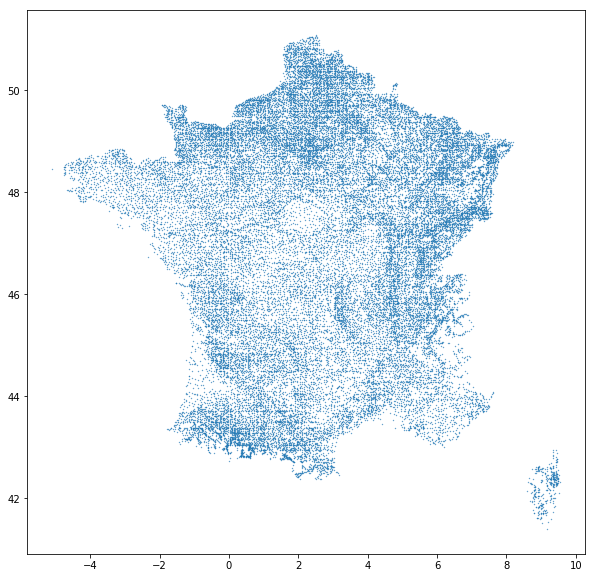

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df_villes.Longitude, df_villes.Latitude, s=0.1)
plt.show()

### Exemple avec Folium

In [19]:
! pip install folium

    100% |████████████████████████████████| 81kB 1.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /home/atheane/.cache/pip/wheels/04/d0/a0/b2b8356443364ae79743fce0b9b6a5b045f7560742129fde22
Successfully built folium


In [20]:
import folium
import random

locations = df_villes[['Latitude', 'Longitude']]
print(locations.shape, locations.dropna().shape)
locations.dropna(inplace = True)

locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

(35249, 2) (35183, 2)


/home/atheane/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[45.933333000000005, 5.3333330000000005]

In [21]:
communes_random = random.sample(locationlist, 50)

In [22]:
map = folium.Map(location=[47.088615, 2.637424], zoom_start=6)
for point in range(0,len(communes_random)) :
    folium.Marker(communes_random[point]).add_to(map)
map